In [86]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, kstest, norm
from scipy.special import gamma

seq = [10**3, 10**4, 10**5, 10**6]
rand_dict = {}
for n in seq:
    np.random.seed(123)
    rand_dict[n] = np.random.uniform(size=n)

rand_dict

{1000: array([6.96469186e-01, 2.86139335e-01, 2.26851454e-01, 5.51314769e-01,
        7.19468970e-01, 4.23106460e-01, 9.80764198e-01, 6.84829739e-01,
        4.80931901e-01, 3.92117518e-01, 3.43178016e-01, 7.29049707e-01,
        4.38572245e-01, 5.96778966e-02, 3.98044255e-01, 7.37995406e-01,
        1.82491730e-01, 1.75451756e-01, 5.31551374e-01, 5.31827587e-01,
        6.34400959e-01, 8.49431794e-01, 7.24455325e-01, 6.11023511e-01,
        7.22443383e-01, 3.22958914e-01, 3.61788656e-01, 2.28263231e-01,
        2.93714046e-01, 6.30976124e-01, 9.21049399e-02, 4.33701173e-01,
        4.30862763e-01, 4.93685098e-01, 4.25830290e-01, 3.12261223e-01,
        4.26351307e-01, 8.93389163e-01, 9.44160018e-01, 5.01836676e-01,
        6.23952952e-01, 1.15618395e-01, 3.17285482e-01, 4.14826212e-01,
        8.66309158e-01, 2.50455365e-01, 4.83034264e-01, 9.85559786e-01,
        5.19485119e-01, 6.12894526e-01, 1.20628666e-01, 8.26340801e-01,
        6.03060128e-01, 5.45068006e-01, 3.42763834e-01, 3.

In [58]:
# compute sample statistics
def sample_stats(sample_dict, max_min=False):
    stats_df = pd.DataFrame(columns=seq)
    for key in sample_dict:
        stats_df.loc['mean', key] = sample_dict[key].mean()
        stats_df.loc['variance', key] = sample_dict[key].var()
        stats_df.loc['std dev', key] = sample_dict[key].std()
        stats_df.loc['skew', key] = skew(sample_dict[key])
        stats_df.loc['kurtosis', key] = kurtosis(sample_dict[key])
        if max_min:
            stats_df.loc['max', key] = max(sample_dict[key])
            stats_df.loc['min', key] = min(sample_dict[key])
    return stats_df

sample_stats(rand_dict)

1000       10000       100000       1000000
mean       0.499373   0.498231    0.500341     0.499933
variance  0.0811874  0.0831035   0.0831573    0.0832245
std dev    0.284934   0.288277     0.28837     0.288487
skew      0.0300405 -0.0077118 -0.00174474  0.000574522
kurtosis   -1.13029   -1.20671    -1.19826     -1.19974

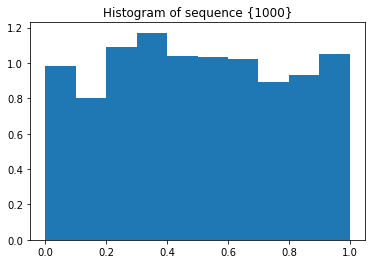

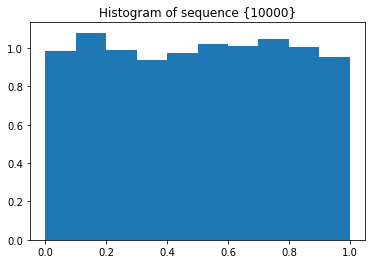

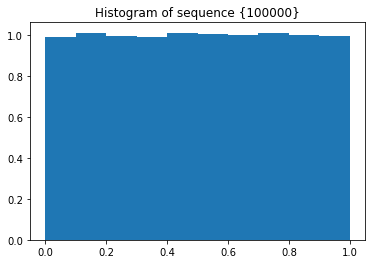

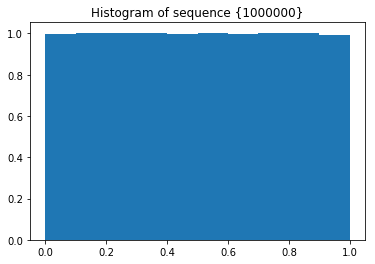

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# histogram
for key in rand_dict:
    plt.hist(rand_dict[key], bins=10, normed=True)
    plt.title("Histogram of sequence {%s}" % key)
    plt.show()

In [30]:
for key in rand_dict:
    ks_rlt = kstest(rand_dict[key], 'uniform')
    print("Sequence {%s} has a K-S statistics value: %s"
          % (key, ks_rlt[0]))

Sequence {1000} has a K-S statistics value: 0.025222960578770853
Sequence {10000} has a K-S statistics value: 0.008002577626569918
Sequence {100000} has a K-S statistics value: 0.0019948378392255495
Sequence {1000000} has a K-S statistics value: 0.0007942206627012949


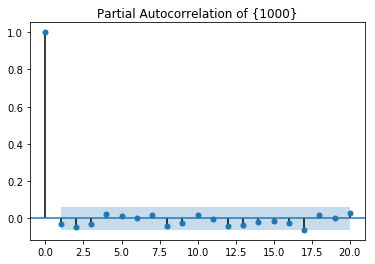

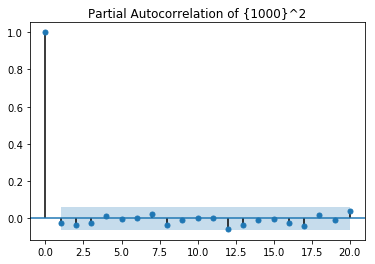

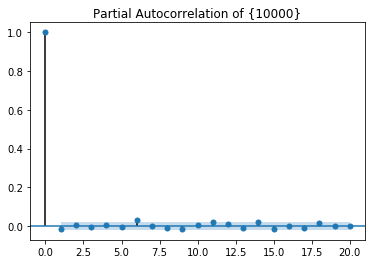

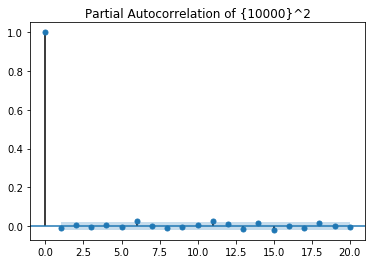

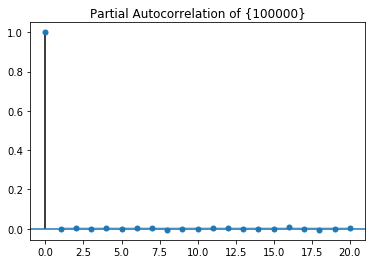

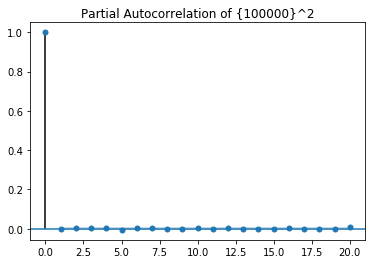

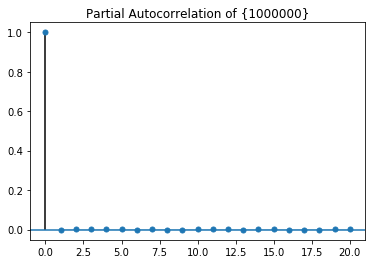

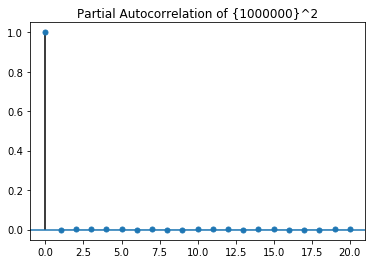

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf

# test autocorrelation
for key in rand_dict:
    plot_pacf(rand_dict[key], lags=20, title="Partial Autocorrelation of {%s}" % key)
    plot_pacf(np.power(rand_dict[key], 2), lags=20, title="Partial Autocorrelation of {%s}^2" % key)

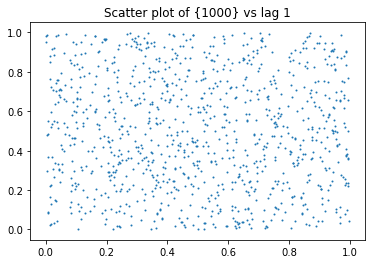

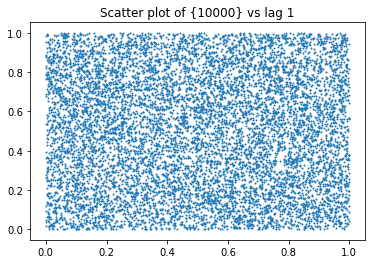

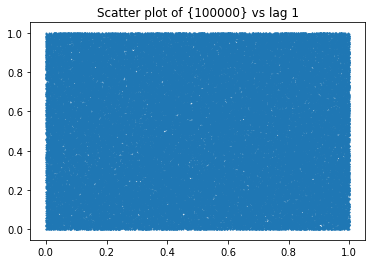

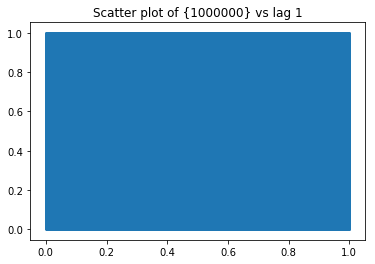

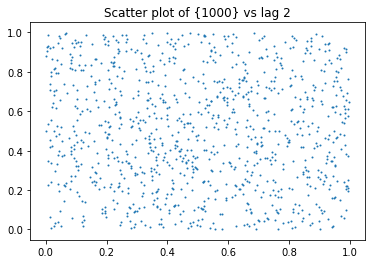

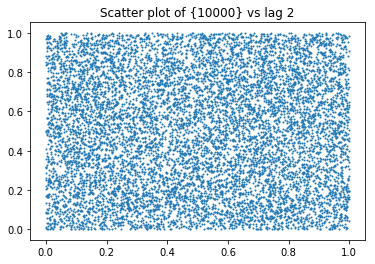

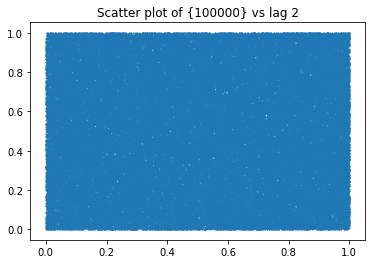

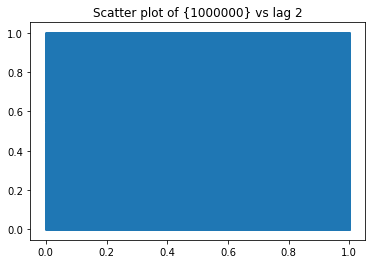

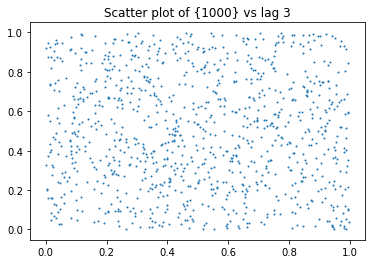

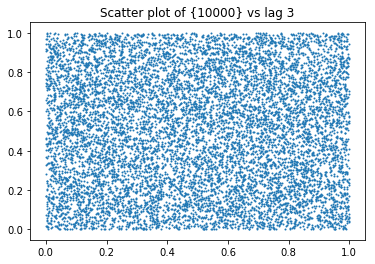

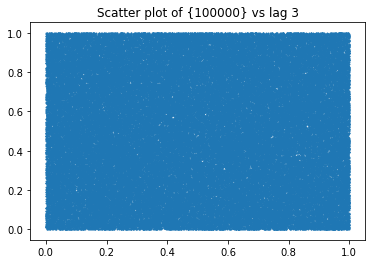

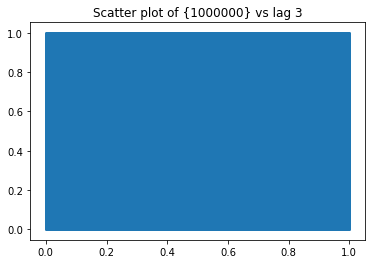

In [38]:
# two-dimentional scatter plot
lags = [1, 2, 3]
for lag in lags:
    for key in rand_dict:
        plt.scatter(rand_dict[key][:-lag], rand_dict[key][lag:], s=1)
        plt.title("Scatter plot of {%s} vs lag %s" % (key, lag))
        plt.show()

In [55]:
# Box-Muller method
def box_muller(U1, U2):
    assert len(U1) == len(U2)
    X = []
    Y = []
    for i in range(len(U1)):
        theta = 2 * np.pi * U1[i]
        R = np.sqrt(-2 * np.log(U2[i]))
        X.append(R * np.cos(theta))
        Y.append(R * np.sin(theta))
    return X, Y

U1 = [np.random.uniform()]
U2 = [np.random.uniform()]
print("Two independent uniform variables (%s, %s) are used to generate two independent normal variables (%s)"
     % (U1, U2, box_muller(U1, U2)))

Two uniform variables ([0.019948827345841025], [0.9234407522220117]) are used to generate two normal variables (([0.395989504066925], [0.04989575980887002]))


In [61]:
normal_dict = {}
for key in rand_dict:
    u_ls = rand_dict[key]
    U1 = u_ls[:int(len(u_ls)/2)]
    U2 = u_ls[int(len(u_ls)/2):]
    X, Y = box_muller(U1, U2)
    normal_dict[key] = np.array(X + Y)
    print("Sequence {%s} of generated normal variables: %s" % (key, X + Y))

sample_stats(normal_dict, max_min=True)

Sequence {1000} of generated normal variables: [-0.5805773210053864, -0.30797041026212757, 0.08216622604111837, -1.9246065960744365, -0.09031628203923918, -1.0479042798600877, 1.2966806203241097, -0.6129969324417273, -0.4136968900828795, -0.8939047103624383, -0.3649722837532729, -0.07273860588573826, -0.3724124463624214, 1.43720354871065, -1.1779565300026535, -0.0767791535979975, 0.5264051851891217, 0.1683391837687129, -1.3316313498796781, -1.191186472033237, -0.6524619694808925, 0.7866809983205145, -0.019638228398880023, -1.648785374793226, -0.2995275841637723, -0.66560825351643, -1.263478118019301, 0.2159637234376704, -0.1915646493737633, -0.7744248855249676, 2.1775240194638914, -0.1712315486838788, -0.8929487476755829, -2.3777254686802434, -0.8126617897358731, -0.5316007716982879, -1.7885415290974467, 0.8394045910346429, 0.7497585118586264, -0.8930222525492588, -1.1893960075410146, 0.8487820672776474, -0.4570671124724485, -0.7019386232080709, 0.9542664014793525, -0.00192349499628025

Sequence {100000} of generated normal variables: [-0.47121549597543927, -0.388633188474141, 0.16864990387284023, -0.9497954351469607, -0.20350573487946028, -1.2035761941729282, 1.1210165212156624, -0.7362277713699573, -0.9889059214961019, -0.09051789372435042, -0.7691397519130843, -0.16514257677245525, -1.2159228599474075, 1.5544564985775007, -1.3198303462655494, -0.09520735687494836, 0.2594567491420552, 0.6183980457382324, -0.1403080584721207, -1.1206144985393847, -1.4632878401069416, 1.1221067143201524, -0.08708455667200136, -1.257555937397491, -0.24765441483745188, -0.320641529877386, -0.7777202648605224, 0.21821195029842846, -0.4412096206397531, -1.1616817876023788, 1.3390719098156585, -1.197116277867177, -1.9057652360142454, -0.8982472826366296, -0.6782376943665013, -0.5858653423069683, -0.7931855267663219, 0.5766698548774212, 0.5686866762964495, -2.6873185969218265, -0.9777868514518642, 1.6604165059268985, -0.4463613913716535, -0.39653235423254685, 0.7029602422763693, -0.00458713

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


1000        10000       100000       1000000
mean      0.0203217 -0.00505672 -0.00326697  0.000130227
variance    0.97133    0.992457     1.00166     0.999861
std dev    0.985561    0.996222     1.00083     0.999931
skew       0.104051   -0.037488   0.0100657  0.000546113
kurtosis -0.0329014 -0.00884217  -0.0317869   -0.0066369
max         3.08725     4.04684     4.52409      4.89529
min        -2.89203    -3.85214     -4.3271     -4.71665

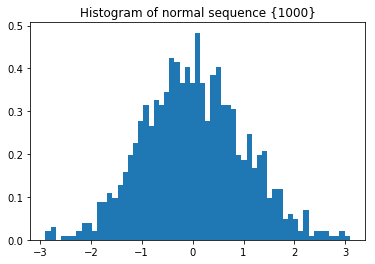

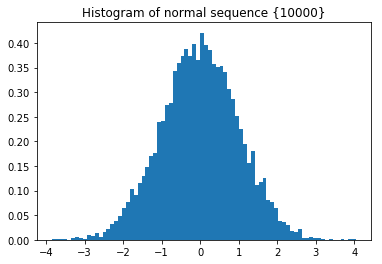

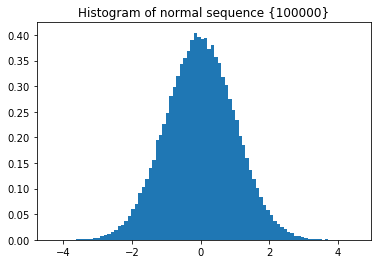

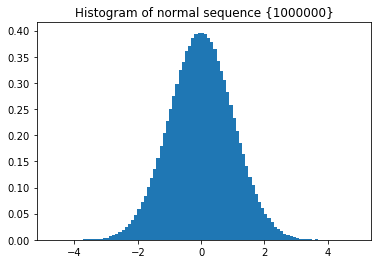

In [134]:
# histogram
plt.rcParams['figure.figsize'] = [6, 4]
for key in normal_dict:
    seq_min = min(normal_dict[key])
    seq_max = max(normal_dict[key])
    plt.hist(normal_dict[key], bins=int((seq_max-seq_min)/0.1), normed=True)
    plt.title("Histogram of normal sequence {%s}" % key)
    plt.show()

In [70]:
# K-S test
for key in normal_dict:
    ks_rlt = kstest(normal_dict[key], 'norm')
    print("Sequence {%s} has a K-S statistics value: %s"
          % (key, ks_rlt[0]))

Sequence {1000} has a K-S statistics value: 0.018779639879853177
Sequence {10000} has a K-S statistics value: 0.005525382180269767
Sequence {100000} has a K-S statistics value: 0.0027915439977656553
Sequence {1000000} has a K-S statistics value: 0.00070588416252515


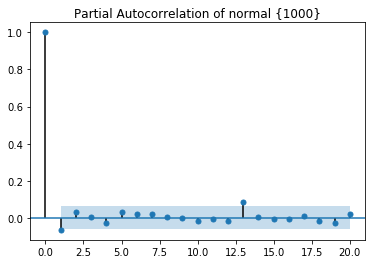

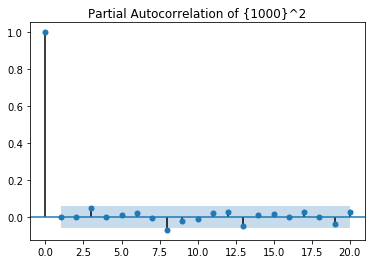

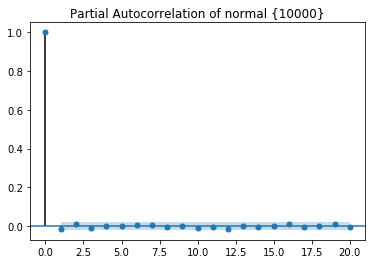

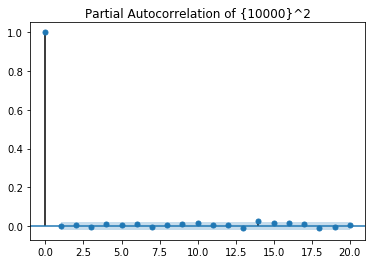

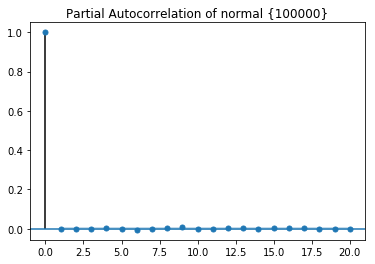

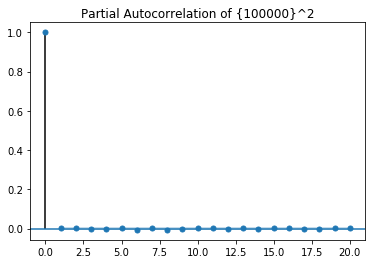

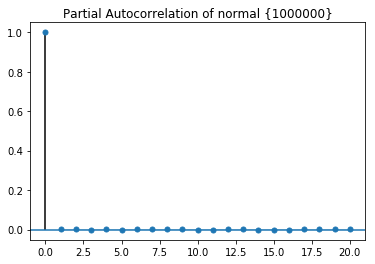

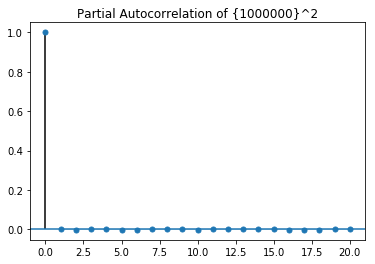

In [71]:
# test autocorrelation
for key in normal_dict:
    plot_pacf(normal_dict[key], lags=20, title="Partial Autocorrelation of normal {%s}" % key)
    plot_pacf(np.power(normal_dict[key], 2), lags=20, title="Partial Autocorrelation of {%s}^2" % key)

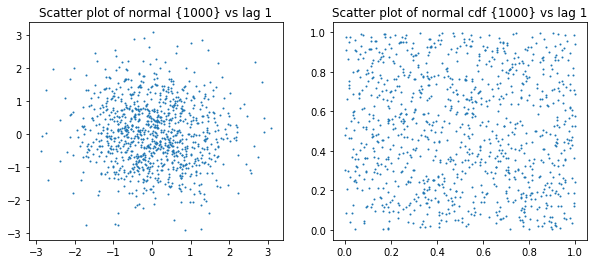

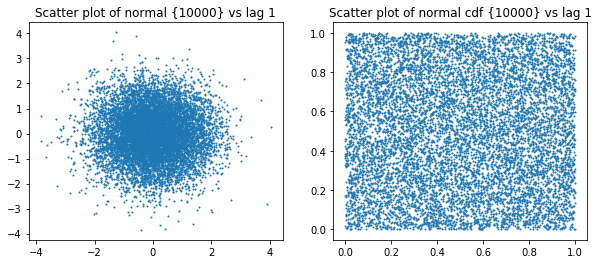

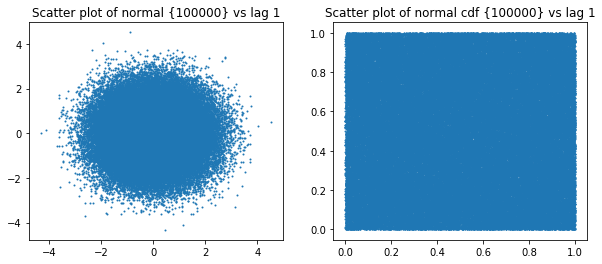

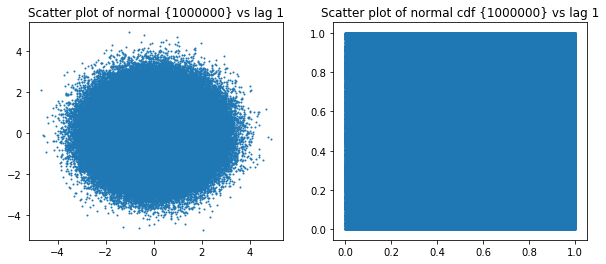

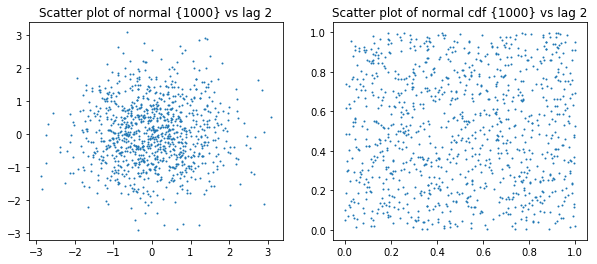

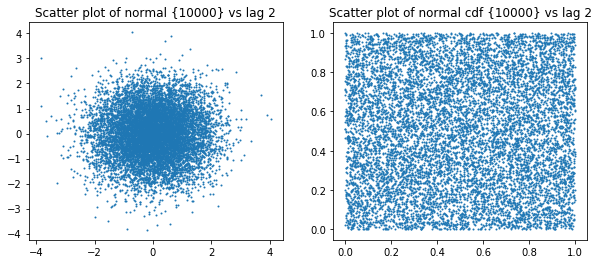

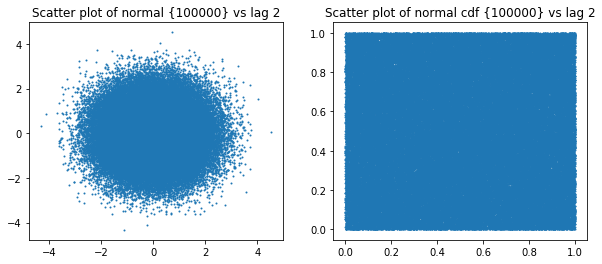

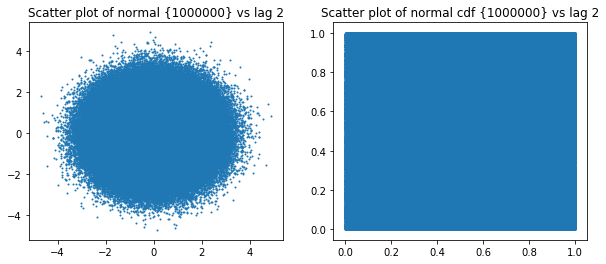

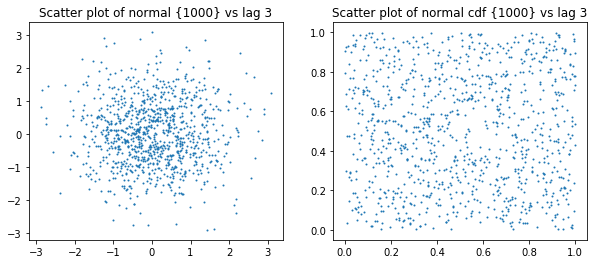

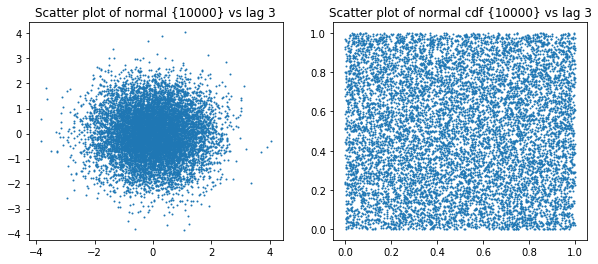

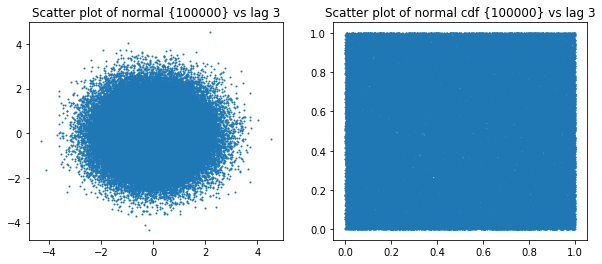

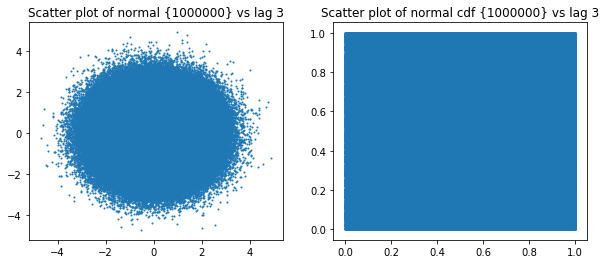

In [137]:
# two-dimentional scatter plot
plt.rcParams['figure.figsize'] = [10, 4]
lags = [1, 2, 3]
for lag in lags:
    for key in normal_dict:
        plt.subplot(121)
        plt.scatter(normal_dict[key][:-lag], normal_dict[key][lag:], s=1)
        plt.title("Scatter plot of normal {%s} vs lag %s" % (key, lag))
        plt.subplot(122)
        plt.scatter(norm.cdf(normal_dict[key][:-lag]), norm.cdf(normal_dict[key][lag:]), s=1)
        plt.title("Scatter plot of normal cdf {%s} vs lag %s" % (key, lag))
        plt.show()

In [178]:
# variation properties of SBM
def SBM_variation(m, W, length, n):
    s = 0
    for i in range(1, n+1):
        #print("iteration: %s, value: %s" % (i, np.power(abs(W[int(i * length / n)] - W[int((i - 1) * length / n)]), m)))
        s += np.power(abs(W[int(i * length / n)] - W[int((i - 1) * length / n)]), m)
    return s

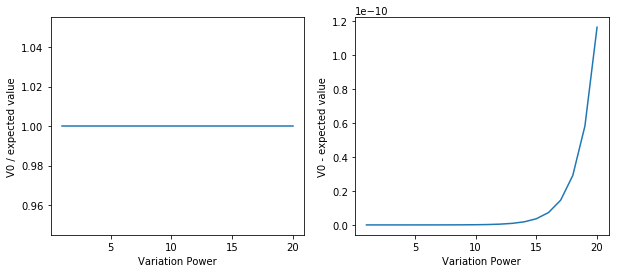

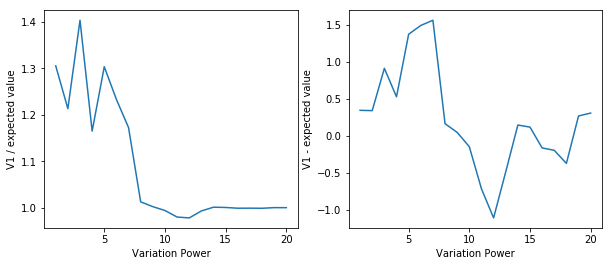

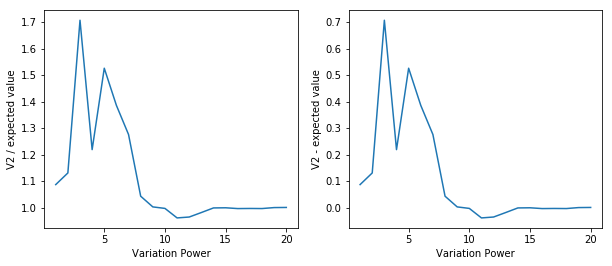

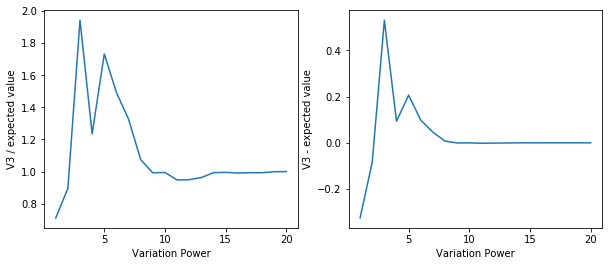

In [180]:
plt.rcParams['figure.figsize'] = [10, 4]
inc = 20
j_ls = np.arange(1, inc+1)
m_ls = np.arange(4)
n = 2**(inc)
for m in m_ls:
    true_ls = []
    sbm_ls = []
    for j in j_ls:
        np.random.seed(123)
        dt = 1 / 2**j
        rand_ls = np.sqrt(dt) * np.random.normal(0, 1, size=2**j)
        W = [0] + np.cumsum(rand_ls).tolist()
        true_ls.append((1/2**j)**(m/2-1) * 2**(m / 2) / np.sqrt(np.pi) * gamma((m + 1) / 2))
        sbm_ls.append(SBM_variation(m, W, 2**j, 2**j))
    plt.subplot(121)
    plt.plot(j_ls, np.divide(sbm_ls, true_ls), '-')
    plt.xlabel("Variation Power")
    plt.ylabel("V%s / expected value" % m)
    plt.subplot(122)
    plt.plot(j_ls, np.subtract(sbm_ls, true_ls), '-')
    plt.xlabel("Variation Power")
    plt.ylabel("V%s - expected value" % m)
    plt.show()